# Lesson 5. Reproject Raster Data Python


## Reprojecting

In [3]:
# Import ncessary packages

import os
import matplotlib.pyplot as plt
import numpy as np
import geopandas as gpd
from rasterio.crs import CRS
import rioxarray as rxr
import earthpy as et

# Set working directory
os.chdir(os.path.join(et.io.HOME,
                      'earth-analytics',
                      'data'))
         


In [5]:
# Get data from Boulder Open Data portal
boluder_road = gpd.read_file(
  "https://opendata.arcgis.com/datasets/5388d74deeb8450e8b0a45a542488ec8_0.geojson")

boluder_road.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [10]:
# Clip the boulder data to the extent of the study area aoo
aoi_path = os.path.join("colorado-flood",
                        "spatial",
                        "boulder-leehill-rd",
                        "clip-extent.shp")

# Open crop extent (your study area extent boundary)
crop_extent = gpd.read_file(aoi_path)
print("The CRS of the data is: ", crop_extent.crs)

# Reproject the crop extent data to match the roads layer.
crop_extent_wgs84 = crop_extent.to_crs(boluder_road.crs)

# Clip the buildings and roads to the extent of the study area using geopandas
roads_clip = gpd.clip(boluder_road, crop_extent_wgs84)


The CRS of the data is:  epsg:32613


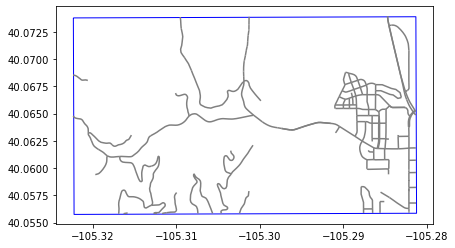

In [13]:
# Plot the clipped data
f, ax = plt.subplots(figsize=(10,4))
crop_extent_wgs84.plot(ax=ax,
                      edgecolor="blue",
                      color="white")

roads_clip.plot(ax=ax,
               color='Grey')
plt.show()

## Open Up Your Raster Data

In [14]:
# Open up a DTM
lidar_dem_path = os.path.join("colorado-flood",
                              "spatial",
                              "boulder-leehill-rd",
                              "pre-flood",
                              "lidar",
                              "pre_DTM.tif")

lidar_dem = rxr.open_rasterio(lidar_dem_path,
                             masked=True).squeeze()

# Check the CRS
lidar_dem.rio.crs

CRS.from_epsg(32613)

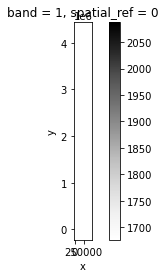

In [24]:
# When you try to overlay the building footprints the data don't line up
f, ax = plt.subplots()
lidar_dem.plot.imshow(ax=ax,
                  cmap='Greys')

roads_clip.plot(ax=ax)

plt.show()



In [25]:
# Reproject the data using the crs from the roads layer
lidar_dem_wgs84 = lidar_dem.rio.reproject(roads_clip.crs)
lidar_dem_wgs84.rio.crs

CRS.from_epsg(4326)

In [28]:
# Reproject the data to another crs - 4326?
# Create a rasterio crs object for wgs 84 crs - lat / lon
crs_wgs84 = CRS.from_string('EPSG:4326')

# Reproject the data using the crs object
lidar_dem_wgs84_2 = lidar_dem.rio.reproject(crs_wgs84)
lidar_dem_wgs84_2.rio.crs

CRS.from_epsg(4326)

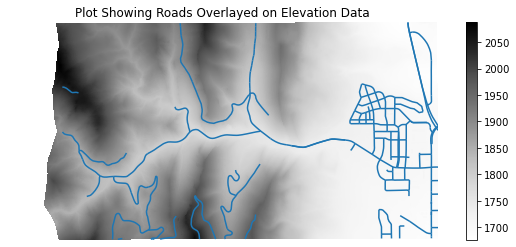

In [29]:
# Plot your newly converted data
f, ax = plt.subplots(figsize=(10,4))

lidar_dem_wgs84.plot.imshow(ax=ax,
                           cmap='Greys')

roads_clip.plot(ax=ax)
ax.set(title="Plot Showing Roads Overlayed on Elevation Data")
ax.set_axis_off()
plt.show()

##  Challenge: Reproject a Hillshade Layer

In [58]:
# Import earthy plot

import earthpy.plot as ep

# Open up a hillshade
lidar_dem_path_hill = os.path.join("colorado-flood",
                                   "spatial",
                                   "boulder-leehill-rd",
                                   "pre-flood",
                                   "lidar",
                                   "pre_DTM_hill.tif")

lidar_dem_hill = rxr.open_rasterio(lidar_dem_path_hill,
                                  masked=True).squeeze()

# Reproject the data using the crs from the roads layer
lidar_dem_hill_wgs84 = lidar_dem_hill.rio.reproject(roads_clip.crs)



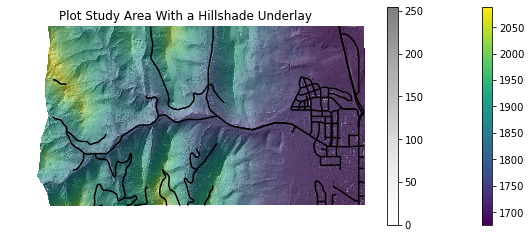

In [65]:
# Plot the data
f, ax = plt.subplots(figsize=(10,4))

lidar_dem_wgs84.plot.imshow(ax=ax,
                            cmap="viridis")  

lidar_dem_hill_wgs84.plot.imshow(ax=ax,
                                alpha=0.5,
                                cmap="Greys")

roads_clip.plot(ax=ax, 
               edgecolor='black')
ax.set(title="Plot Study Area With a Hillshade Underlay")
ax.set_axis_off()
plt.show()